<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/09_Gaussian_NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Gaussian Naive Bayes Classifier</h1>

## Overview      

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
    <p>In this section following steps are performed: </p>
    <ol>
        <li>Data Preparation and Encoding</li>
        <li>Training Gaussian Naive Bayes Classifier Model</li>
        <li>k-Fold Cross Validation</li>
    </ol>
</div>


### Standard Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set() 

In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

### 1. Data Preparation and Encoding

#### 1.1 Import Modified Data

In [4]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
data_df = pd.read_csv('./data/xAPI-Edu-Data_modified.csv')

In [5]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_modified.csv'
data_df = pd.read_csv(url)

In [6]:
# Selected Features
CATEGORICAL_FEATURES = ['stage_id','relation', 'parent_answering_survey', 'parent_school_satisfaction','student_absence_days']
NUMERICAL_FEATURES = ['raised_hands', 'visited_resources', 'announcements_view', 'discussion']
TARGET = ['class']

In [7]:
# Optimize Data Type for efficent memory utilization
for feature in CATEGORICAL_FEATURES:
    data_df[feature] = data_df[feature].astype('category')
    
for feature in NUMERICAL_FEATURES:
    data_df[feature] = data_df[feature].astype('int8')

data_df[TARGET] = data_df[TARGET].astype('category')

#### 1.2 Encode Data

In [8]:
# Input Features Encoding
categorical_encoder = OrdinalEncoder(dtype='int8')
categorical_ds  = categorical_encoder.fit_transform(data_df[CATEGORICAL_FEATURES])
categorical_encoded = pd.DataFrame(categorical_ds, columns=CATEGORICAL_FEATURES, dtype='int8')
# Target Encoding
target_encoder = LabelEncoder()
target_ds = target_encoder.fit_transform(data_df[TARGET])
target_encoded = pd.DataFrame(target_ds, columns=TARGET, dtype='int8')
# Combine the Data
encoded_df = pd.concat([categorical_encoded,data_df[NUMERICAL_FEATURES]], axis=1)

### 2.  Gaussian Naive Bayes Model

In [9]:
X = encoded_df
y = target_encoded

In [10]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# Gaussian Naive Bayes
clf = GaussianNB()

#### 2.1 Model Parameters

In [12]:
# Model parameters
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [13]:
# Train the model
clf = clf.fit(X_train, y_train)

#### 2.3 Model Scores

In [14]:
# Test Accuracy
y_hat = clf.predict(X_test)
initial_test_accuracy = accuracy_score(y_test, y_hat)
print(f'NB Test Accuracy: {initial_test_accuracy*100}')
# Train Accuracy
predictions_train = clf.predict(X_train)
initial_train_accuracy = accuracy_score(y_train, predictions_train)
print(f'NB Train Accuracy: {initial_train_accuracy*100}')

NB Test Accuracy: 74.68354430379746
NB Train Accuracy: 73.125


<div style="background-color:Gainsboro; padding:20px; text-align:justify; ">
<p>The accuracy of the model on Training Data (73.125%) is close to the accuracy on Test Data (74.683%), show a resonabiliy skilled model. </p>
</div>

#### 2.4 Confusion Matrix

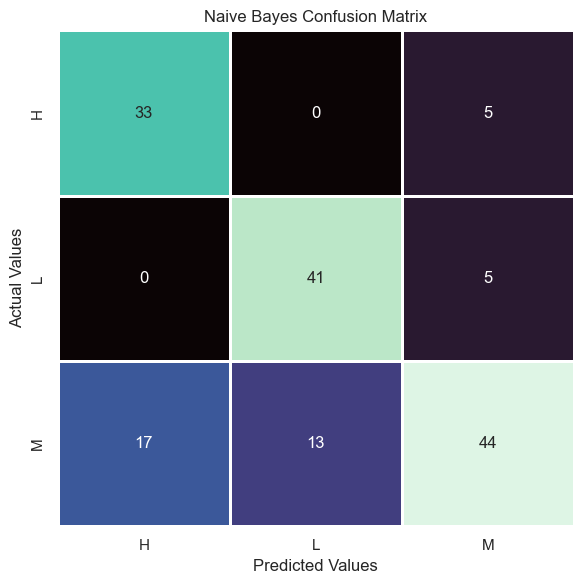

In [15]:
cm_df = pd.DataFrame(confusion_matrix(y_test, y_hat),
                     index = ['H','L','M'], 
                     columns = ['H','L','M'])

fig = plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True, cmap='mako',cbar=False,linewidth=1)
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### 2.5 Classification Report

In [16]:
print('Naive Bayes Classification Report\n')
print(classification_report(y_test,y_hat, target_names=['H','L','M']))

Naive Bayes Classification Report

              precision    recall  f1-score   support

           H       0.66      0.87      0.75        38
           L       0.76      0.89      0.82        46
           M       0.81      0.59      0.69        74

    accuracy                           0.75       158
   macro avg       0.74      0.78      0.75       158
weighted avg       0.76      0.75      0.74       158



### 3. k-Fold Cross Validation

In [17]:
# Model
clf_cv = GaussianNB()
cv = KFold(n_splits=10, random_state=42, shuffle=True)

scores = cross_val_score(clf_cv, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1)

# Performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.716 (0.051)


## Observations
  
The key observations are:  
   
1. The performance of Gaussina Naive Bayes Classifier on the given data is acceptable.
2. The mean accuracy of the cross validation is close to the orginal model.

## Conclusion
Based on the obervations:

1. Looking at the Train and Test accuracies there is no overfitting or under fitting of the model.